# Import Libraries

In [13]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split

import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from num2words import num2words
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Descriptive Analysis

In [15]:
product_data = pd.read_csv("train_product_data.csv")

In [16]:
product_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [17]:
product_data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [18]:
product_data = product_data[['description','product_category_tree']]

In [19]:
product_data.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [20]:
product_data['description'].iloc[1]

'Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synthetic Lifestyle: Casual Heel Type: Wedge Warranty Type: Manufacturer Product Warranty against manufacturing defects: 30 days Care instructions: Allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,Specifications of AW Bellies General Ideal For Women Occasion Casual Shoe Details Color Red Outer Material Patent Leather Heel Height 1 inch Number of Contents in Sales Package Pack of 1 In the Box One Pair Of Shoes'

In [21]:
product_data.isnull().sum()

description              1
product_category_tree    0
dtype: int64

In [22]:
product_data.duplicated().sum()

1832

In [23]:
product_data.dropna(inplace = True) # Dropping observations with missing values
product_data.drop_duplicates(inplace = True) # Dropping duplicate observations
product_data.reset_index(drop = True, inplace = True) # Resetting index

In [24]:
product_data.isnull().sum()

description              0
product_category_tree    0
dtype: int64

In [25]:
product_data.duplicated().sum()

0

In [26]:
product_data.to_csv('product_clean_description.csv')

In [27]:
product_data['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [28]:
product_data['product_category_tree'].nunique()

14

In [29]:
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

In [30]:
product_data['product_category_encoded'] = product_data['product_category_tree'].map(category_mapping)

# EDA

In [32]:
product_data['description_len'] = product_data['description'].apply(lambda x: len(x.split(' ')))
product_data.head()

,description,product_category_tree,product_category_encoded,description_len
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,64
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,1,107
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,65
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,1,64


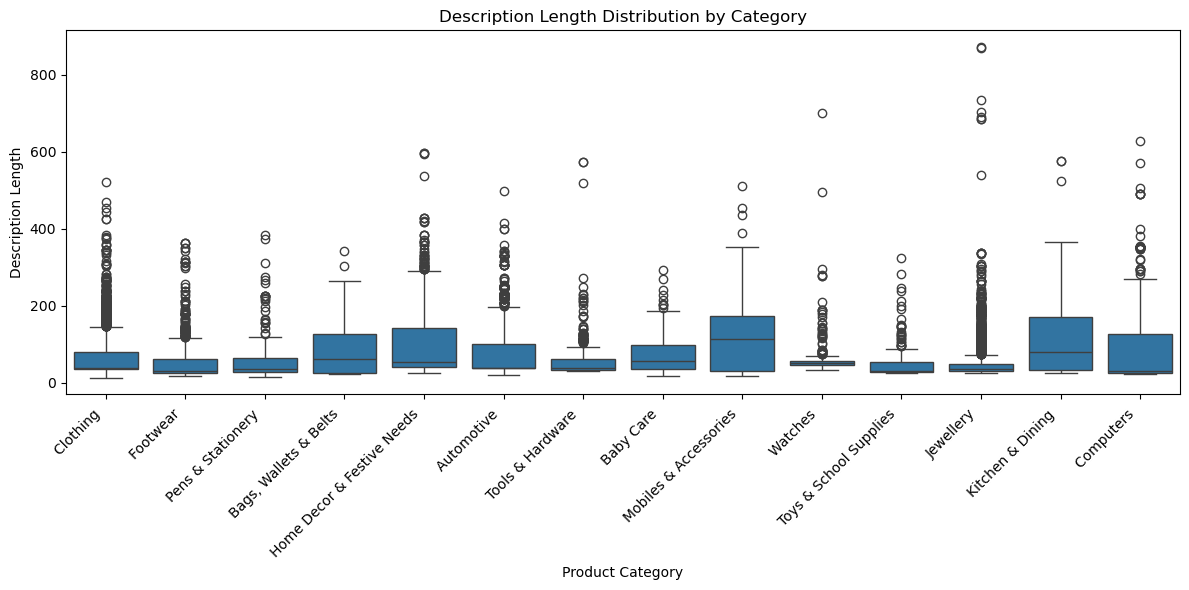

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_tree', y='description_len', data=product_data)
plt.title('Description Length Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Description Length')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Descriptions for products in the "Mobiles & Accessories" category tend to be the longest, followed by "Kitchens & Dining" and "Computers." Descriptions for products in the "Clothing" ,"watches" and "Footwear" categories tend to be on the shorter side.


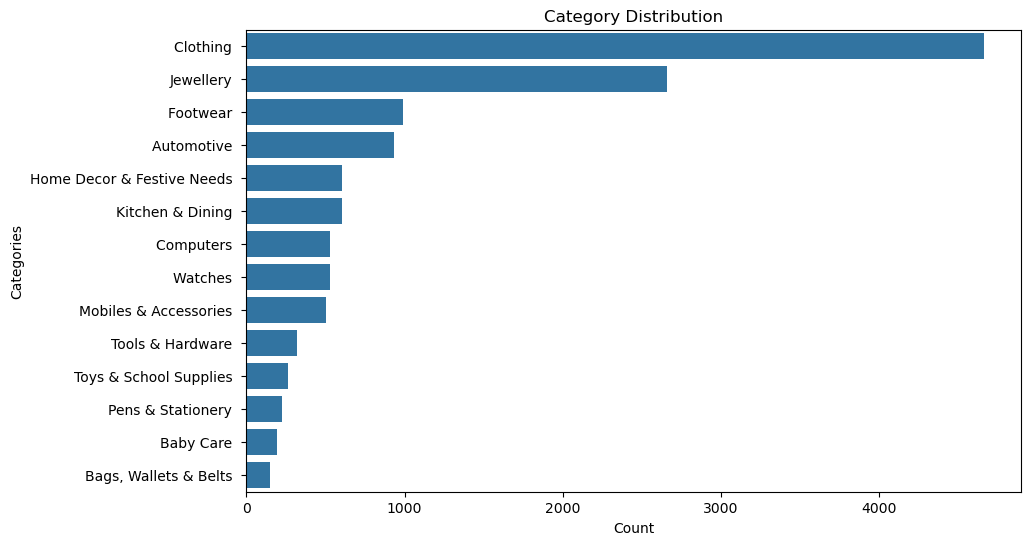

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(y="product_category_tree", data=product_data, order=product_data['product_category_tree'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

# Text Preprocessing 

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/abhinav/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
def text_normalizer(text) :

  text = re.sub(r'[^\w\d\s]', ' ', text)  # Remove punctuation
  
  text = re.sub(r'\s+', ' ', text) # Replace whitespace between terms with a single space
  
  text = re.sub(r'^\s+|\s+?$', '', text) # Remove leading and trailing whitespace
  
  text = text.lower()  # converting to lower case
  
  text = re.sub(r'\d+', '', text) # Replace numbers like price values with 'numbr'

  return text

In [41]:
product_data['description'] = product_data['description'].apply(text_normalizer)

In [42]:
general_stopwords = stopwords.words('english')

In [43]:
def word_tokenizing(text,stop_words):

  tokens = word_tokenize(text)
  return ' '.join([token for token in tokens if token not in stop_words])

In [44]:
product_data['description'] = product_data['description'].apply(lambda text : word_tokenizing(text, general_stopwords))

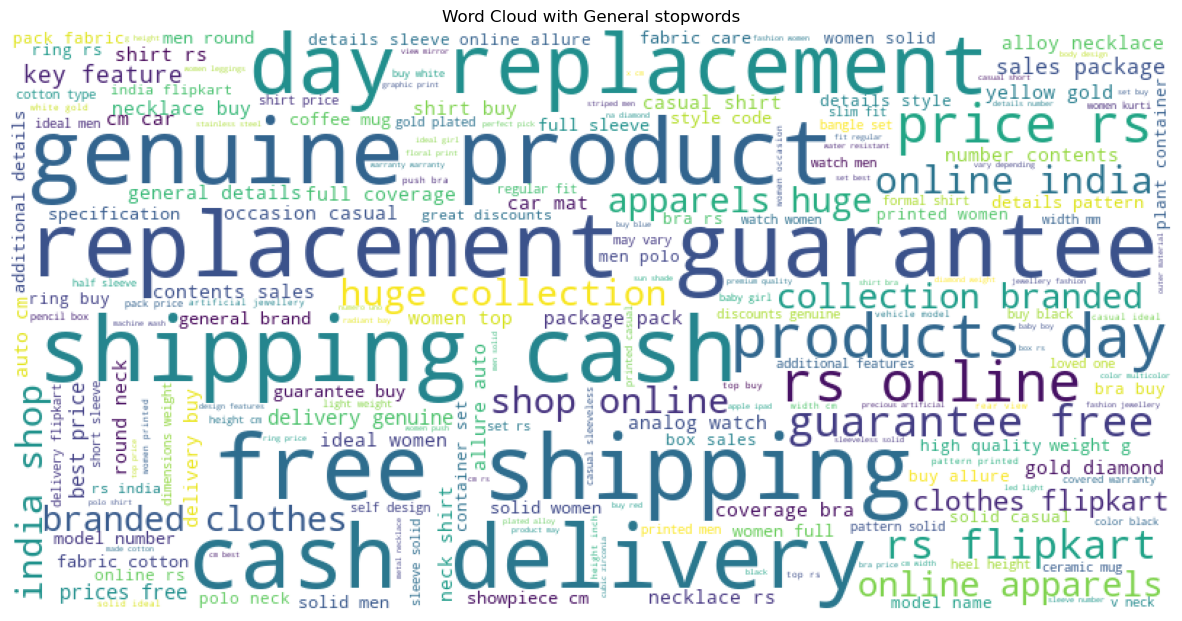

In [45]:
wordcloud = WordCloud(background_color='white', width = 800, height = 400).generate(' '.join(product_data.description))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud with General stopwords')
plt.show()

In [47]:
ecommerce_stopwords = ['India', 'line',
    'payment', 'shop', 'size', 'cash', 'checkout', 'free', 'available', 'color', 'tracking', 'promo',
    'day', 'key', 'product', 'customer', 'warranty', 'method', 'genuine', 'com', 'guarantee',
    'price', 'review', 'return', 'exchange', 'replacement', 'flipkart', 'delivery', 'offer', 'deal',
    'cart', 'rating', 'shipping', 'india', 'discount', 'stock', 'brand', 'rs', 'sale', 'shopping',
    'buy', 'order', 'online', 'feature', 'products'
]

In [48]:
product_data['description'] = product_data['description'].apply(lambda text : word_tokenizing(text, ecommerce_stopwords))

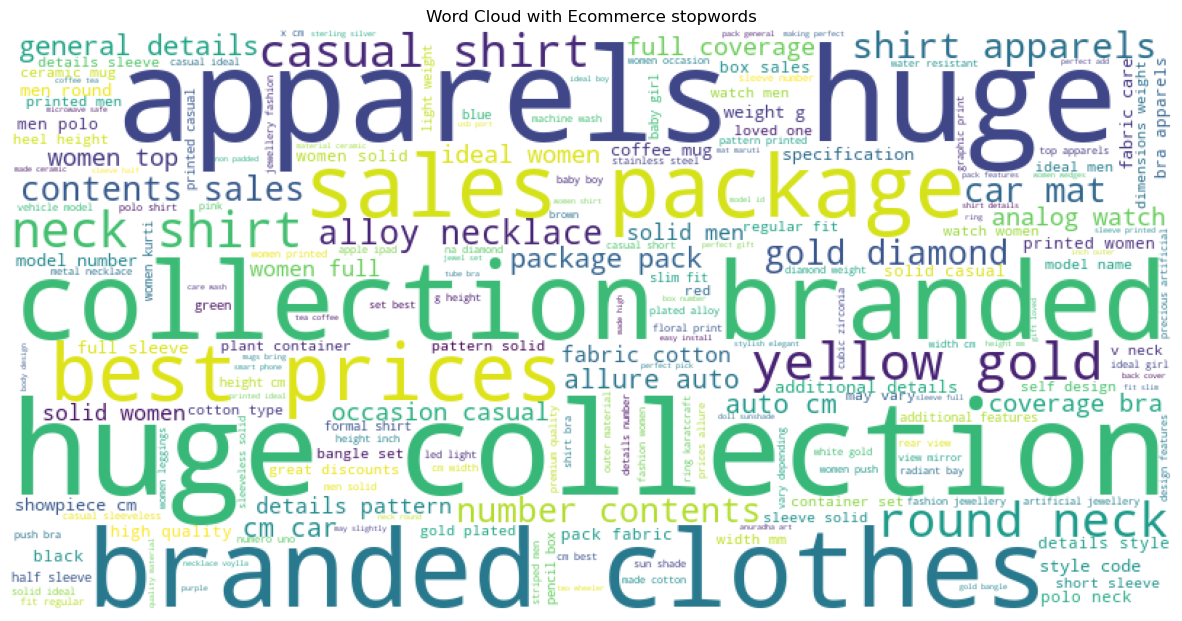

In [179]:
wordcloud = WordCloud(background_color='white', height=400, width=800).generate(' '.join(product_data.description))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud with Ecommerce stopwords')
plt.show()

# Train validation split

In [52]:
X = product_data['description']
y = product_data['product_category_encoded']


# Train-test split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print("Training data: " ,len(X_train), len(y_train))
print("Validation data: ",len(X_val), len(y_val))

Training data:  10532 10532
Validation data:  2634 2634


# Test data setup

In [54]:
product_test_data = pd.read_csv("test_data.csv")

In [55]:
print("Testing data without label: ",product_test_data.shape)

Testing data without label:  (2534, 14)


In [56]:
X_test = product_test_data['description'].apply(text_normalizer)

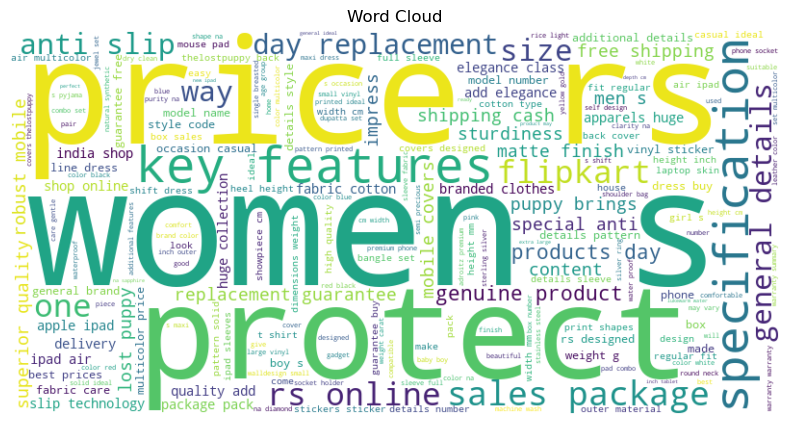

In [57]:
from wordcloud import WordCloud

text = " ".join(description for description in X_test)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud')
plt.show()

# TF-IDF Model

In [59]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train)
X_val_tfidf = TfidfVec.transform(X_val)
X_test_tfidf = TfidfVec.transform(X_test)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

# TF-IDF Baseline Modeling

In [63]:
# Classifiers
names = [
    "MultinomialNB",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [64]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [65]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
5,SGD Classifier,0.993164,0.984055
6,Ridge Classifier,0.995063,0.983295
3,Linear SVM,0.993543,0.981397
7,XGBoost,0.998766,0.976462
4,Random Forest,0.999335,0.973804
2,Decision Tree,0.999335,0.953683
0,MultinomialNB,0.941227,0.922172
1,KNN Classifier,0.912172,0.913060
8,AdaBoost,0.584125,0.583523


The Ridge Classifier, SGD Classifier, and Linear SVM stand out with high training and validation accuracies. This indicates that these models are robust and generalize well to new data, making them the best choices for this task.

# TF-IDF Hyperparameter Tuning

In [136]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest accuracy for each class is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [137]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score,confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [138]:
# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],        # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], # Solvers
    'class_weight':[None, 'balanced']                 # Whether to normalize the input features
}


In [153]:
best_ridge, best_hyperparams = tune_clf_hyperparameters(RidgeClassifier(), param_grid, X_train_tfidf, y_train)
print('Optimal Hyperparameters: \n',  best_hyperparams)

Optimal Hyperparameters: 
 {'alpha': 1.0, 'class_weight': 'balanced', 'solver': 'auto'}


# Evaluation

In [155]:
# Reverse the category mapping to map numeric labels back to category names
reverse_category_mapping = {v: k.strip() for k, v in category_mapping.items()}

def map_labels(y, reverse_mapping):
    return [reverse_mapping[label] for label in y]

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Map numeric labels to category names
    y_train_mapped = map_labels(y_train, reverse_category_mapping)
    y_test_mapped = map_labels(y_test, reverse_category_mapping)

    # Predict using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Map numeric predictions to category names
    y_train_pred_mapped = map_labels(y_train_pred, reverse_category_mapping)
    y_test_pred_mapped = map_labels(y_test_pred, reverse_category_mapping)

    # Evaluate the model on the train data
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train_mapped, y_train_pred_mapped))

    # Evaluate the model on the test data
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test_mapped, y_test_pred_mapped))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_mapped, y_test_pred_mapped, labels=list(reverse_category_mapping.values()))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(14, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=list(reverse_category_mapping.values()), 
                yticklabels=list(reverse_category_mapping.values()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()


	  Classification report for training set
-------------------------------------------------------
                            precision    recall  f1-score   support

                Automotive       1.00      1.00      1.00       748
                 Baby Care       0.87      1.00      0.93       156
     Bags, Wallets & Belts       1.00      1.00      1.00       122
                  Clothing       1.00      0.99      1.00      3730
                 Computers       1.00      1.00      1.00       423
                  Footwear       1.00      1.00      1.00       790
Home Decor & Festive Needs       1.00      1.00      1.00       485
                 Jewellery       1.00      1.00      1.00      2126
          Kitchen & Dining       1.00      1.00      1.00       485
     Mobiles & Accessories       1.00      1.00      1.00       401
         Pens & Stationery       0.99      0.94      0.97       179
          Tools & Hardware       1.00      1.00      1.00       257
    Toys & Schoo

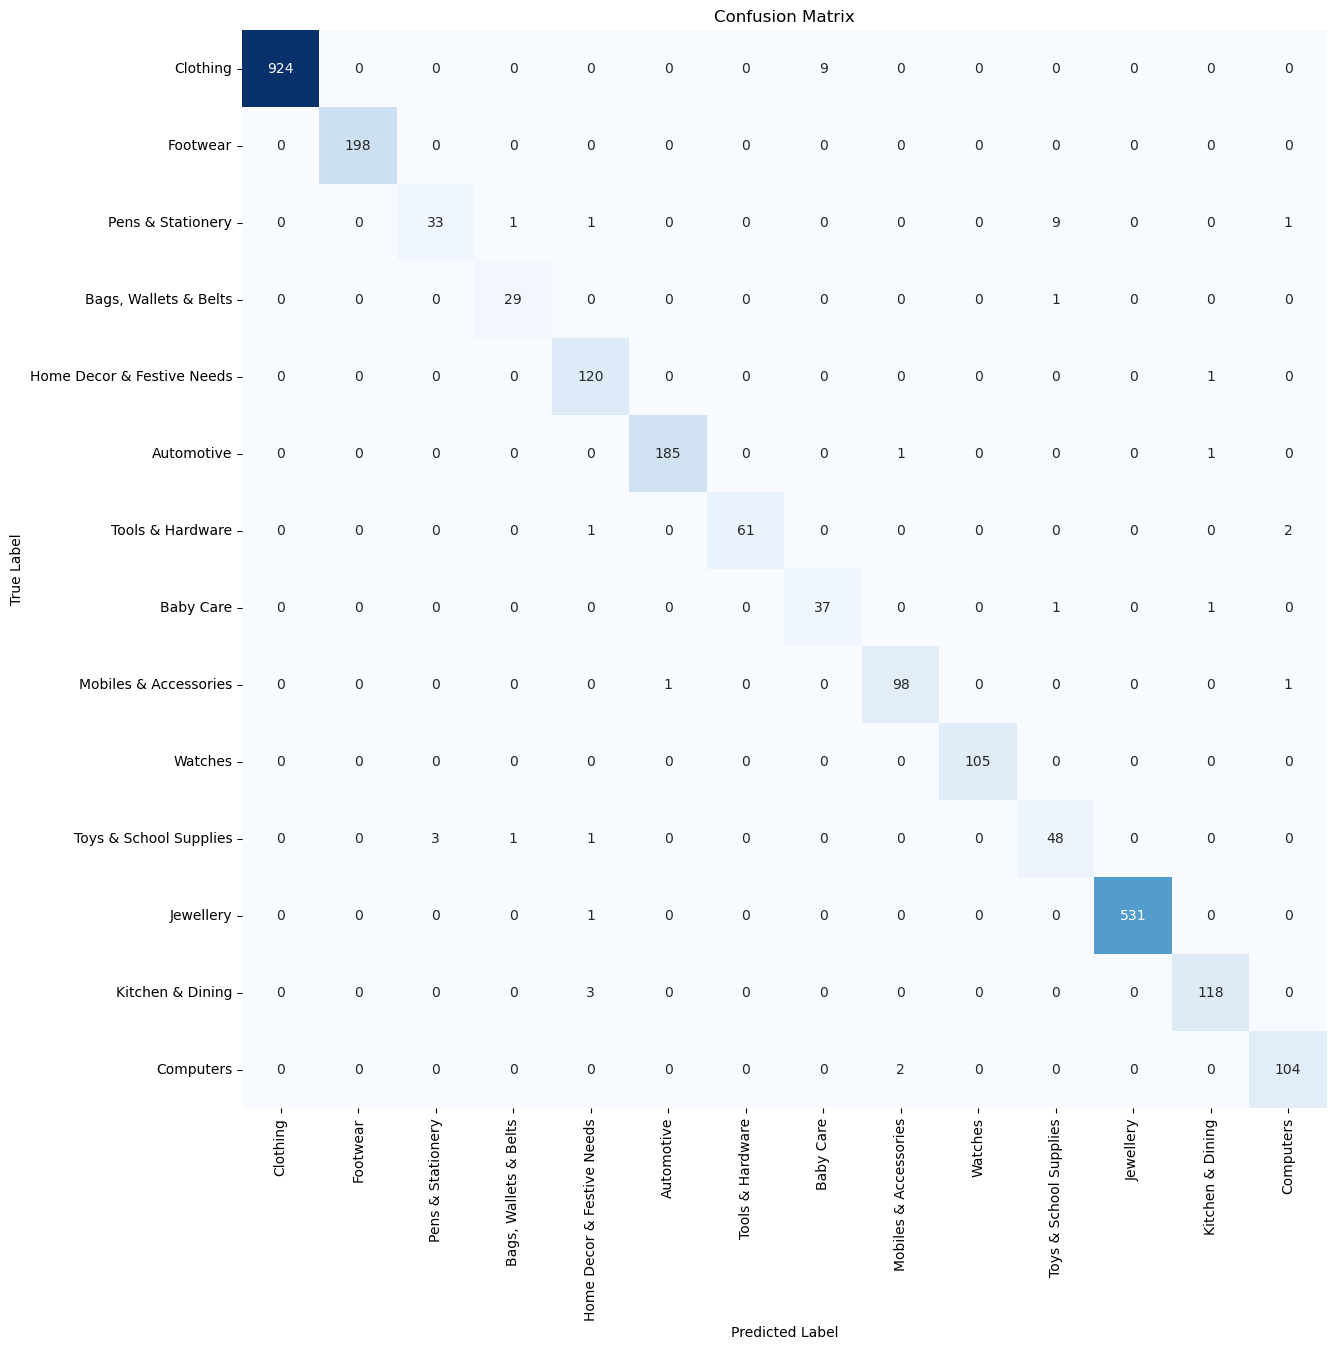

In [157]:
evaluate_model(best_ridge, X_train_tfidf, y_train, X_val_tfidf, y_val)

# Accuracy Prediction on Test Result Data

In [159]:
test_result = pd.read_csv("test_results.csv")
test_result.shape

(2534, 1)

In [161]:
y_test_pred = best_ridge.predict(X_test_tfidf)

In [163]:
test_result.isnull().sum()

product_category_tree    0
dtype: int64

In [165]:
type(y_test_pred)

numpy.ndarray

In [167]:
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

y_test = test_result['product_category_tree'].map(category_mapping)

In [169]:
y_test = np.array(y_test)

In [171]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8571


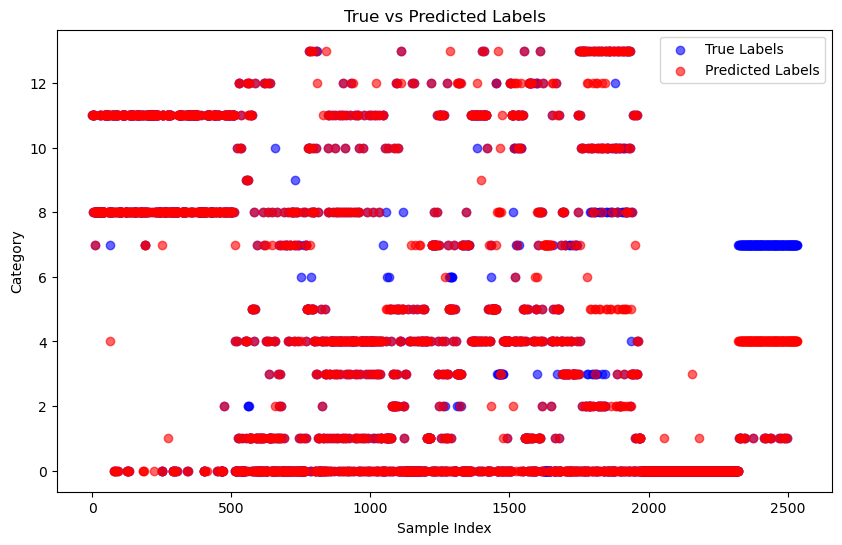

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted Labels', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Category')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()
